In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import json
from os.path import expanduser
import sqlite3
import seaborn as sns

#### compare dynamic range of minimum voxel intensity settings

In [4]:
experiment_name = 'P3856'
run_name = 'P3856_YHE211_1_Slot1-1_1_5104'

In [5]:
FEATURES_3DID_1000_FILE = '/media/big-ssd/results-P3856-3did/minvi-1000/features-3did/exp-{}-run-{}-features-3did-dedup.pkl'.format(experiment_name, run_name)
FEATURES_3DID_2500_FILE = '/media/big-ssd/results-P3856-3did/minvi-2500/features-3did/exp-{}-run-{}-features-3did-dedup.pkl'.format(experiment_name, run_name)
FEATURES_3DID_5000_FILE = '/media/big-ssd/results-P3856-3did/minvi-5000/features-3did/exp-{}-run-{}-features-3did-dedup.pkl'.format(experiment_name, run_name)

In [6]:
# load the features detected by 3DID
with open(FEATURES_3DID_1000_FILE, 'rb') as handle:
    d = pickle.load(handle)
features_3did_1000_df = d['features_df']

with open(FEATURES_3DID_2500_FILE, 'rb') as handle:
    d = pickle.load(handle)
features_3did_2500_df = d['features_df']

with open(FEATURES_3DID_5000_FILE, 'rb') as handle:
    d = pickle.load(handle)
features_3did_5000_df = d['features_df']

In [7]:
features_3did_1000_df['minimum voxel intensity'] = 1000
features_3did_2500_df['minimum voxel intensity'] = 2500
features_3did_5000_df['minimum voxel intensity'] = 5000

In [8]:
features_3did_1000_df['log_intensity'] = np.log10(features_3did_1000_df.feature_intensity)
features_3did_2500_df['log_intensity'] = np.log10(features_3did_2500_df.feature_intensity)
features_3did_5000_df['log_intensity'] = np.log10(features_3did_5000_df.feature_intensity)

In [9]:
intensities_l = [features_3did_1000_df,features_3did_2500_df,features_3did_5000_df]
intensities_df = pd.concat(intensities_l, sort=False)

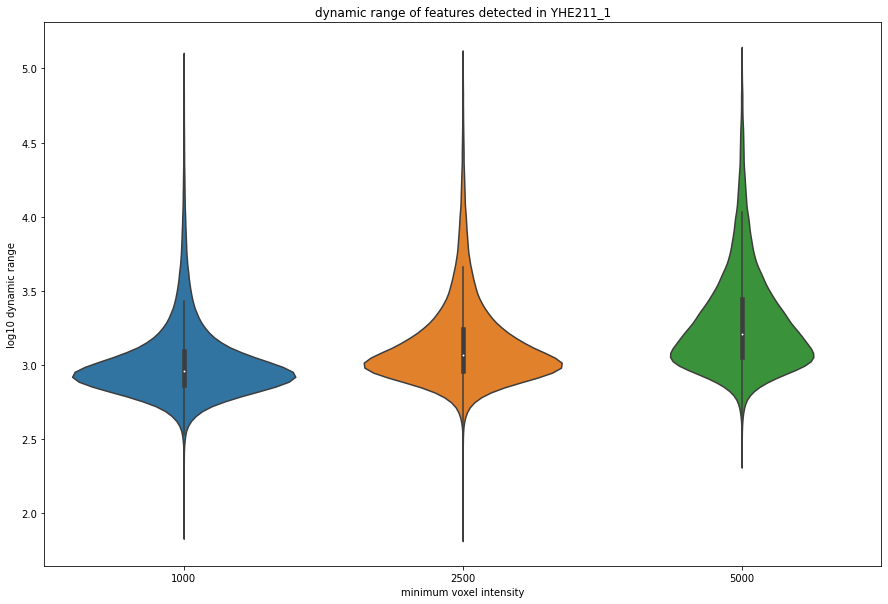

In [10]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x=intensities_df['minimum voxel intensity'], y=intensities_df.log_intensity)
_ = plt.ylabel("log10 dynamic range")
_ = plt.title('dynamic range of features detected in YHE211_1')

In [11]:
features_3did_1000_df.log_intensity.max()-features_3did_1000_df.log_intensity.min()

3.204543659242381

In [12]:
features_3did_2500_df.log_intensity.max()-features_3did_2500_df.log_intensity.min()

3.204543659242381

In [13]:
features_3did_5000_df.log_intensity.max()-features_3did_5000_df.log_intensity.min()

2.6840511533824056

In [15]:
features_3did_1000_df.feature_intensity.max(), features_3did_2500_df.feature_intensity.max()

(116914, 116914)